# Intra-Class

> Examining the distribution within classes

In [ ]:
#| hide
from nbdev.showdoc import *

In [ ]:
import random

import torch.nn.functional as F

from fastai.vision.all import *

from similarity_learning.all import *

from Few_Shot_Feature_Space.utils import *

In [ ]:
def draw_centroid_sample_pair(features_by_class, c=None):
    f = random.choice(list(features_by_class.values())) if c is None else features_by_class[c]
    return [f.centroid, random.choice(f)]

def draw_sample_pair(features_by_class, c=None):
    f = random.choice(list(features_by_class.values())) if c is None else features_by_class[c]
    return [random.choice(f), random.choice(f)]

def intra_class_angles(pair_sampler, n_samples=int(1e5)):
    dl = TfmdDL(range(n_samples),
                num_workers=0,
                after_item=lambda _: pair_sampler(),
                after_batch=lambda o: F.cosine_similarity(*o))
    return torch.cat(list(progress_bar(dl))).cpu()

def off_centroid_angles(features_by_class, n_plots=5, n_samples=int(1e5)):
    fig, axs = plt.subplots(1, n_plots, figsize=(n_plots*5, 5))
    fig.suptitle('Off Centroid Pairwise Angles')
    clusters = random.sample([ftrs for ftrs in features_by_class.values() if ftrs.size(0) > 100], n_plots)
    for ftrs, ax in zip(clusters, axs):
        points = list(ftrs.off_centroid_features)
        dl = TfmdDL(range(n_samples),
                    num_workers=0,
                    after_item=lambda _: random.sample(points, 2),
                    after_batch=lambda o: F.cosine_similarity(*o).clip(-1, 1).arccos().rad2deg())
        plot_hist(torch.cat(list(progress_bar(dl))).cpu(), ax=ax)

def intra_class_hist(dl, fe, c=None):
    class_ftrs = ClassFeatures.compute(dl, fe, min_samples=30)
    
    angles = intra_class_angles(lambda: draw_centroid_sample_pair(class_ftrs))
    ax = plot_hist(angles)

    angles = intra_class_angles(lambda: draw_sample_pair(class_ftrs))
    ax = plot_hist(angles)
    ax.legend(['Angles From Centroid', 'Angles Between Samples'])

    off_centroid_angles(class_ftrs)

In [ ]:
vggface2_fe, casia_webface_fe = fr_feature_extractors()
lfw_dl, pfr_dl = fr_dataloaders()

## VGGFace2

### LFW

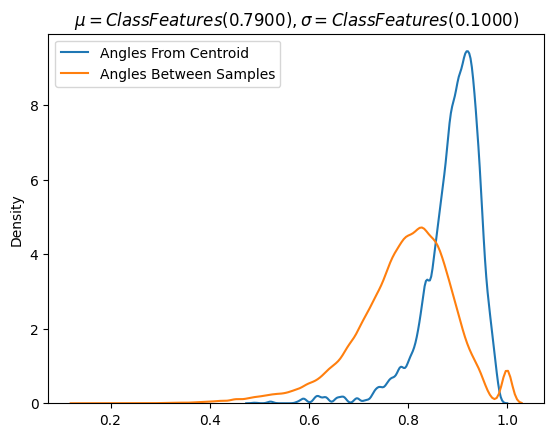

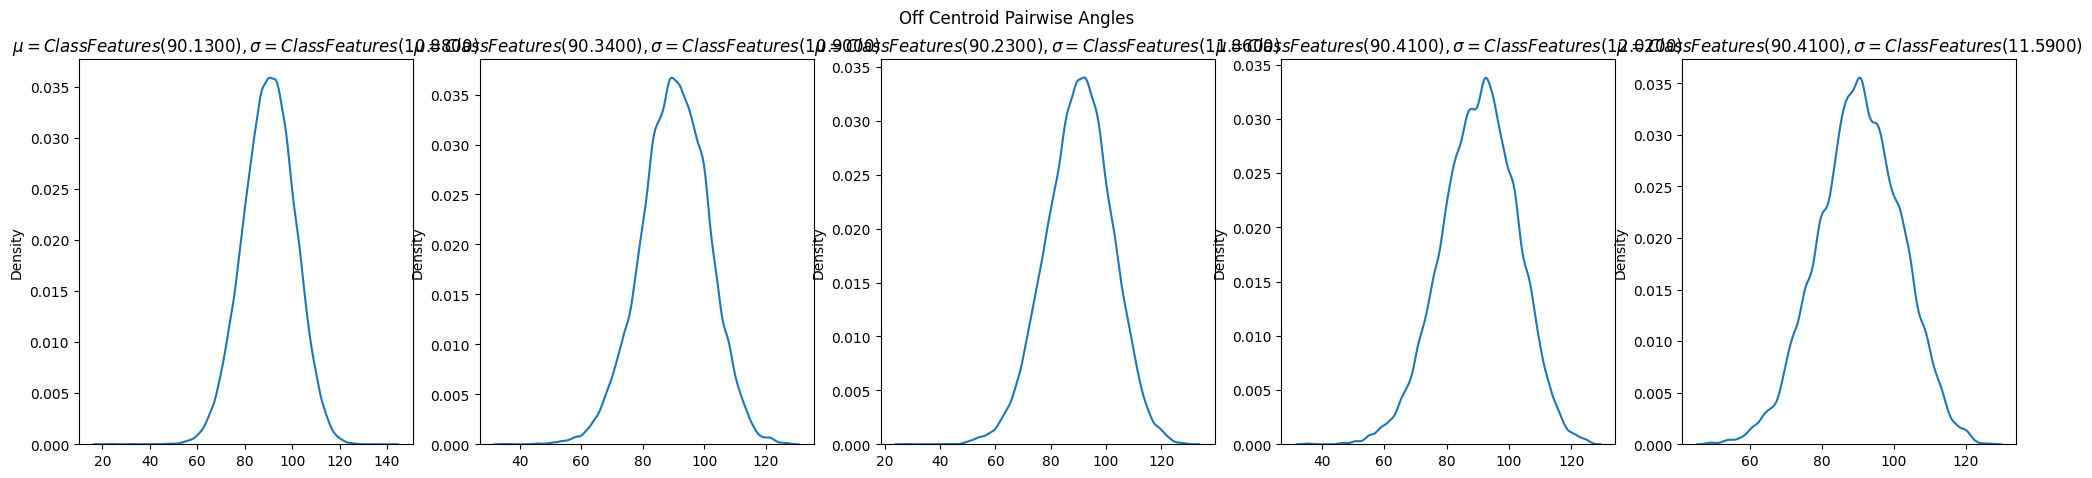

In [ ]:
intra_class_hist(lfw_dl, vggface2_fe)

### PFR

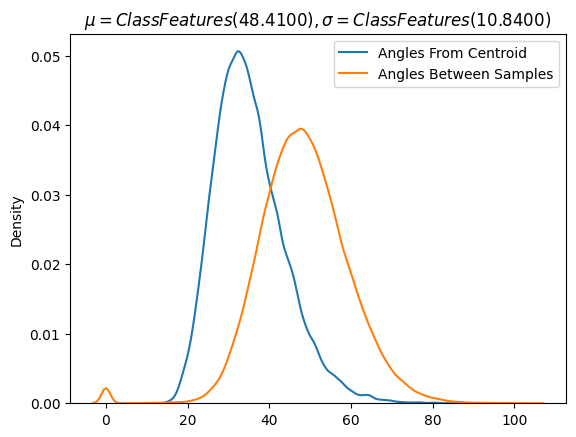

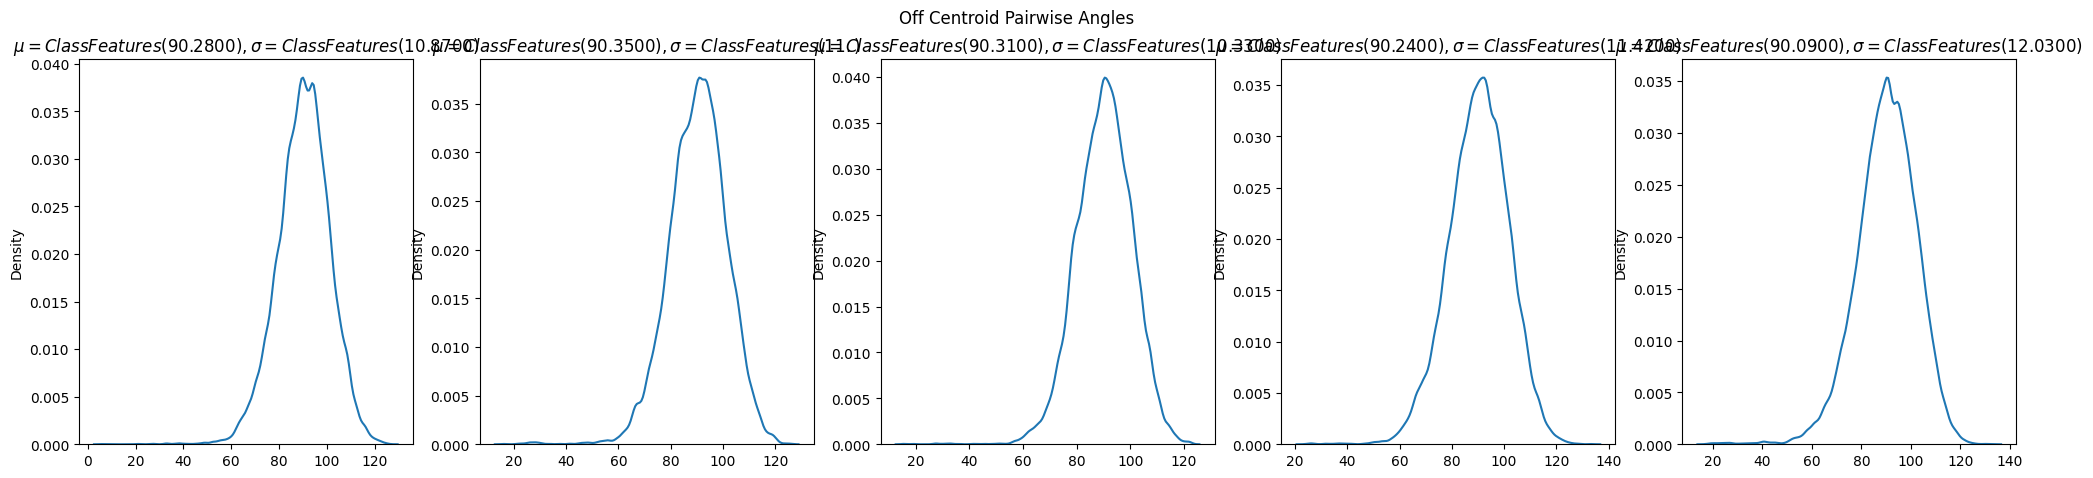

In [ ]:
intra_class_hist(pfr_dl, vggface2_fe)

## CASIA-WebFace

### LFW

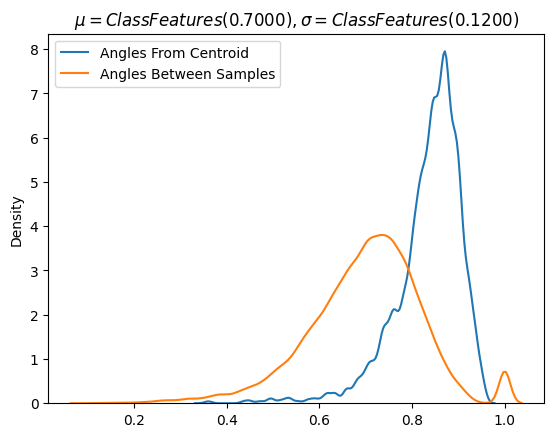

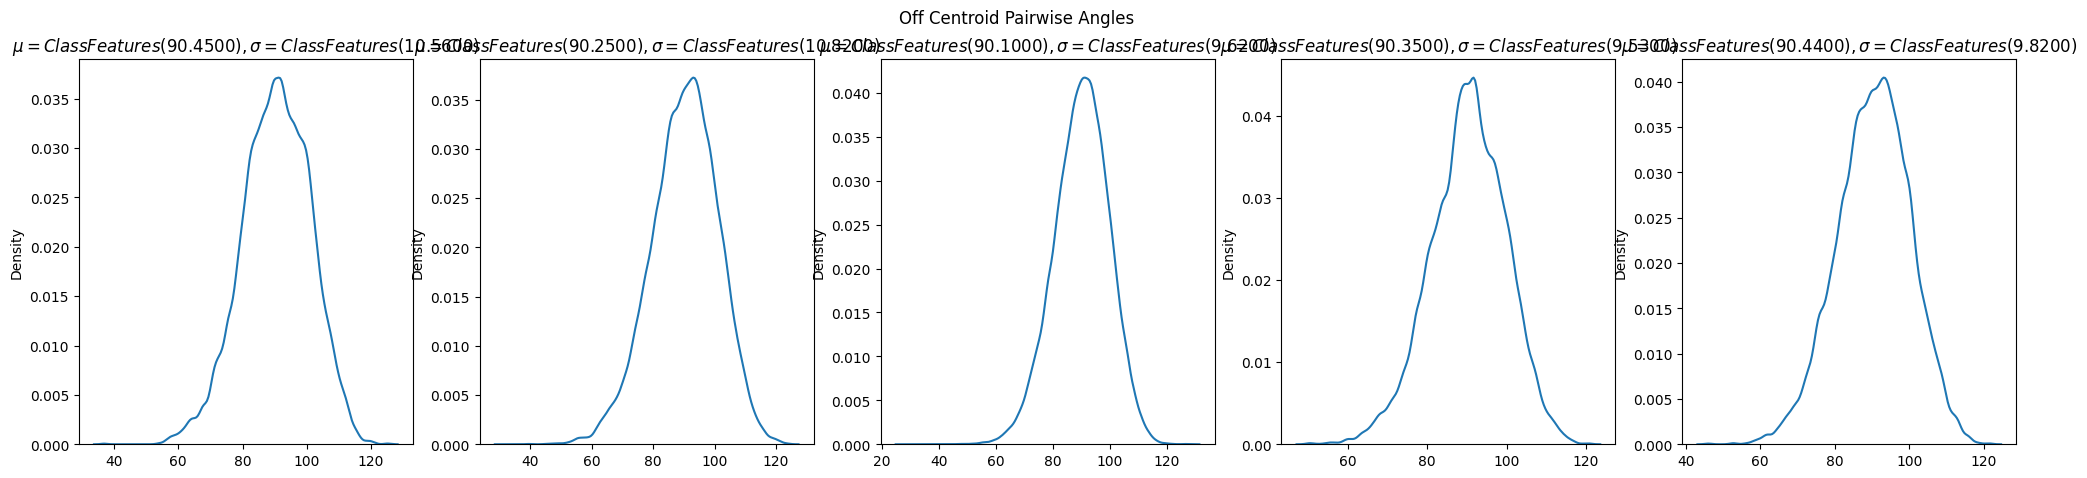

In [ ]:
intra_class_hist(lfw_dl, casia_webface_fe)

### PFR

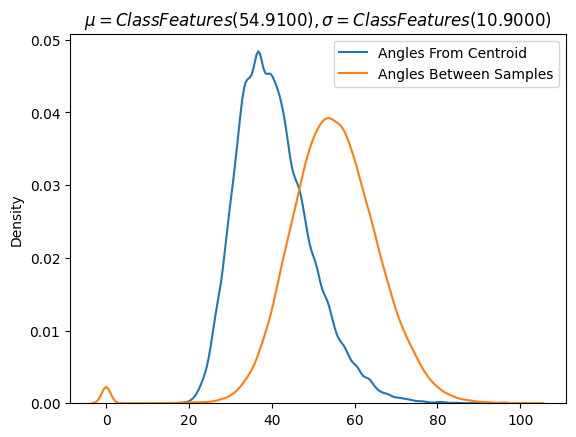

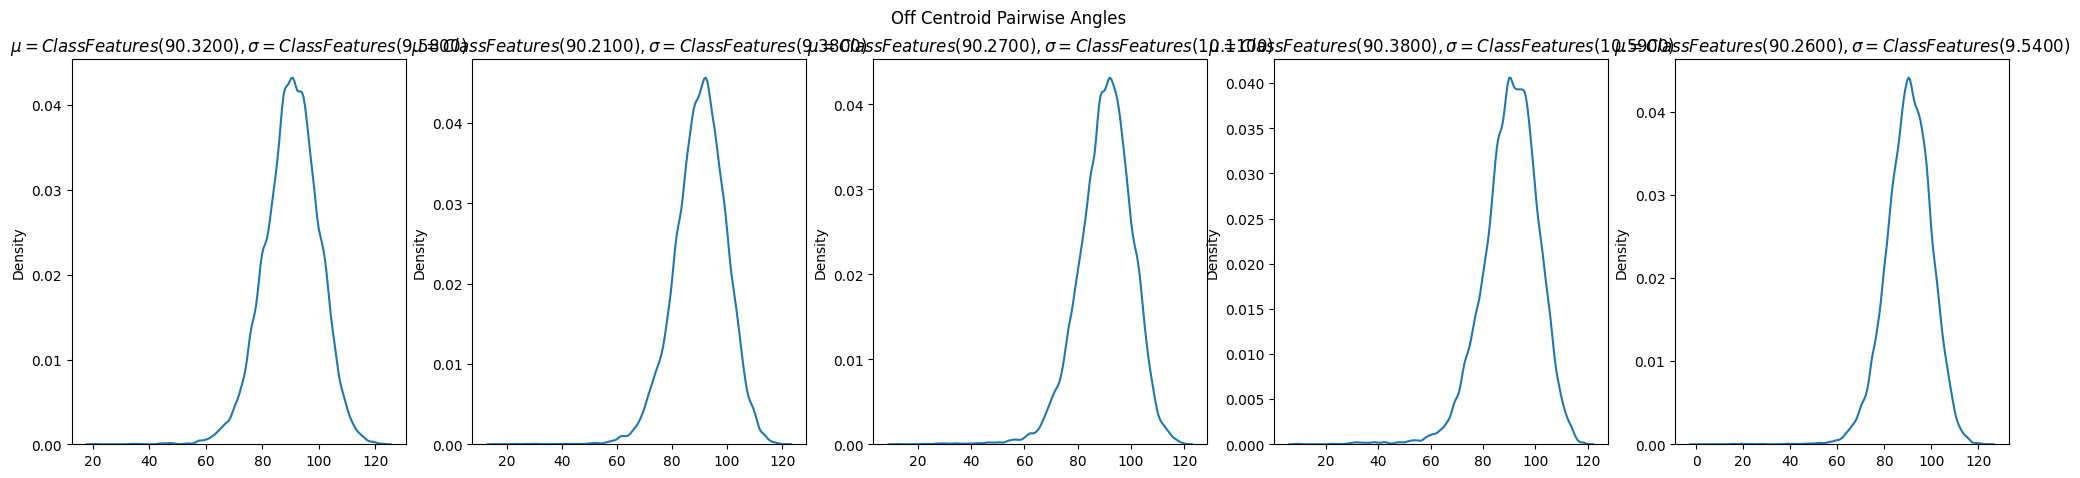

In [ ]:
intra_class_hist(pfr_dl, casia_webface_fe)